# Preliminary

In [2]:
import pandas as pd
import pysam
import random
import numpy as np
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

# from google.colab import data_table
# data_table.enable_dataframe_formatter()
# %load_ext google.colab.data_table

#!pip install google
# !pip install --upgrade google-api-python-client
# !pip install google-colab
# !pip list --outdated
# !pip list --outdated --format=freeze | grep -v '^\-e' | cut -d = -f 1 | xargs -n1 pip3 install -U 


# !pip install plotly
# !pip install seaborn

def table(a):
    # Function similar to R's table function 
    # Get the counts for each element present 
    dic = {}
    for i in a:
        if i in dic:
            dic[i] += 1
        else:
            dic[i] = 1
    return dic

#%cd /home/mbrown/CTAT_VIF/Other_Pipelines/ViFi
!ls -lt


##############
# Plot Function
##############
import plotly.graph_objs as go
def plotFigure(df, y, x):
    fig = go.Figure()
    for min_reads, df_sub in df.groupby("min_reads"):
        fig.add_trace(go.Scatter(x = df_sub[x],
                                y = df_sub[y],
                                mode='markers',
                                name = min_reads))
    fig.update_traces(marker_size=10)
    # fig.layout.yaxis.type = 'category'
    fig.layout.xaxis.type = 'category'
    return fig



def formatFPs(df, hpvs):
    virus_list_list = [[i]*10 for i in hpvs]
    virus_list = list(itertools.chain.from_iterable(virus_list_list))
    depth = [1,2,3,4,5,6,7,8,9,10]
    depth_list = depth*7
    tmp = pd.DataFrame({"min_reads":depth_list,  
                        "vir_chr": virus_list})
    df = tmp.merge(df, how = "left")
    df = df.fillna(0)
    return df

total 1480
drwxr-xr-x  6 bhaas  staff     192 Dec 12 17:17 methods
-rw-r--r--@ 1 bhaas  staff  756783 Dec  8 15:57 Benchmarking.ipynb


# <font color='LightGreen'>Plotting ViFi</font>

## TruePositives

In [4]:

file_in = "methods/ViFi/benchmarking/benchmarking_out/Benchmarking_Output.txt.TP_called_per_virus"
df = pd.read_csv(file_in, sep = "\t")
df

import plotly.express as px
fig = px.strip(df, x="vir_chr", y="sum_found", 
               color="min_reads",
            #    stripmode="overlay"
               ).update_traces(jitter = 1)

fig.update_yaxes(
    range=(0, 50.5),
    constrain='domain'
)
fig.show(renderer="colab")

## FalsePositives

In [6]:
file_in = "methods/ViFi/benchmarking/benchmarking_out/Benchmarking_Output.txt.FP_per_virus"
df = pd.read_csv(file_in, sep = "\t")

hpvs = ["HPV16","HPV18","HPV45","HPV35","HPV31","HPV33","HPV39"]

df = formatFPs(df, hpvs)

import plotly.express as px
fig = px.strip(df, x="vir_chr", y="n", 
               color="min_reads",
            #    stripmode="overlay"
               ).update_traces(jitter = 1)
fig.show(renderer="colab")

# <font color='LightGreen'>Plotting VirusFinder2</font>

## TruePositives

In [39]:
import sys
hpvs = ["HPV16","HPV18","HPV45","HPV35","HPV31","HPV33","HPV39"]

df = pd.DataFrame()
for i in hpvs:
    try:
        file_path = f"methods/VirusFinder2/benchmarking/data/{i}/Benchmarking_Output.txt.TP_called_per_virus"
        df_tmp = pd.read_csv(file_path, sep = "\t")
        df = pd.concat([df,df_tmp])
    except:
        print(f"missing result for {i}", sys.stderr)

df


import plotly.express as px
fig = px.strip(df, x="vir_chr", y="sum_found", 
               color="min_reads")#.update_traces(jitter = 0)
fig.update_traces(marker_size=20)

fig.update_yaxes(
    range=(0, 50.5),
    constrain='domain'
)


fig.show(renderer="colab")

## FalsePositives

In [35]:

import sys
hpvs = ["HPV16","HPV18","HPV45","HPV35","HPV31","HPV33","HPV39"]
df = pd.DataFrame()
for i in hpvs:
    try:
        file_path = f"methods/VirusFinder2/benchmarking/data/{i}/Benchmarking_Output.txt.FP_per_virus"
        #print(file_path)
        df_tmp = pd.read_csv(file_path, sep = "\t")
        df = pd.concat([df,df_tmp])
    except:
        print(f"missing result for {i}", sys.stderr)

    
df = formatFPs(df, hpvs)

import plotly.express as px
fig = px.strip(df, x="vir_chr", y="n", 
               color="min_reads")#.update_traces(jitter = 0)
fig.update_traces(marker_size=20)
fig.show(renderer="colab")

missing result for HPV35 <ipykernel.iostream.OutStream object at 0x7f8b1084e4f0>
missing result for HPV39 <ipykernel.iostream.OutStream object at 0x7f8b1084e4f0>


## True vs False

missing HPV35
missing HPV39


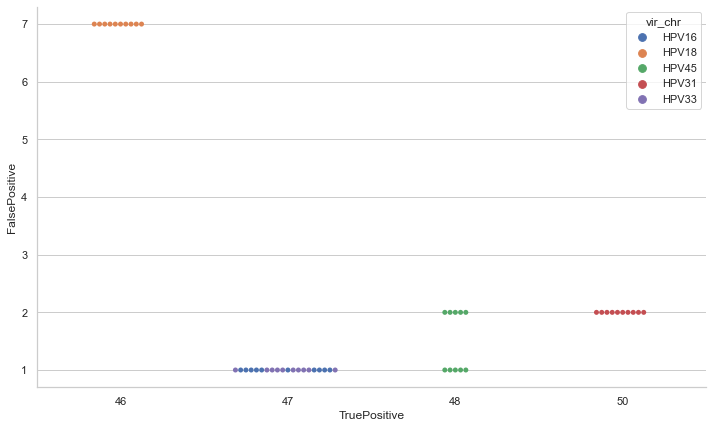

In [40]:


hpvs = ["HPV16","HPV18","HPV45","HPV35","HPV31","HPV33","HPV39"]
df = pd.DataFrame()
for i in hpvs:
    try:
        file_path = f"methods/VirusFinder2/benchmarking/data/{i}/Benchmarking_Output.txt.TP_called_per_virus"
        df_tmp = pd.read_csv(file_path, sep = "\t")
        df = pd.concat([df,df_tmp])
    except:
        print(f"missing {i}", file=sys.stderr)
        
df_true = df
df_true = df_true.rename({"sum_found":"TruePositive"},axis = 1)


df = pd.DataFrame()
for i in hpvs:
    try:
        file_path = f"methods/VirusFinder2/benchmarking/data/{i}/Benchmarking_Output.txt.FP_per_virus"
        df_tmp = pd.read_csv(file_path, sep = "\t")
        df = pd.concat([df,df_tmp])
    except:
        print(f"missing {i}", file=sys.stderr)
    

df_false = df
df_false = df_false.rename({"n":"FalsePositive"},axis = 1)

# table(df_false["FalsePositive"])

df = df_true.merge(df_false, on = ["min_reads","vir_chr"])

fig = px.strip(df, 
               x = "TruePositive", y = "FalsePositive", 
               color="vir_chr")
# fig = px.scatter(df, 
#                x = "TruePositive", y = "FalsePositive", 
#                color="min_reads",
#                symbol="vir_chr")
fig.update_traces(marker_size=10)
fig.show(renderer="colab")





import seaborn as sns

sns.set(style='ticks', context='talk')
sns.set_theme(style="whitegrid")
sns.swarmplot(data=df, x='TruePositive', y='FalsePositive', hue="vir_chr")
sns.despine()

# <font color='LightGreen'>Plotting BatVI</font>

## True Positives

In [14]:
file_in = "methods/BatVI/benchmarking/benchmarking_out/Benchmarking_Output.txt.TP_called_per_virus"
df = pd.read_csv(file_in, sep = "\t")
df


import plotly.express as px
fig = px.strip(df, x="vir_chr", y="sum_found", 
               color="min_reads",
            #    stripmode="overlay"
               ).update_traces(jitter = 1)

fig.update_yaxes(
    range=(0, 50),
    constrain='domain'
)
fig.show(renderer="colab")


## Fasle Postives

In [16]:
file_in = "methods/BatVI/benchmarking/benchmarking_out/Benchmarking_Output.txt.FP_per_virus"
df = pd.read_csv(file_in, sep = "\t")
df = formatFPs(df, hpvs)
import plotly.express as px
fig = px.strip(df, x="vir_chr", y="n", 
               color="min_reads",
            #    stripmode="overlay"
               ).update_traces(jitter = 1)
fig.show(renderer="colab")

## True vs. False

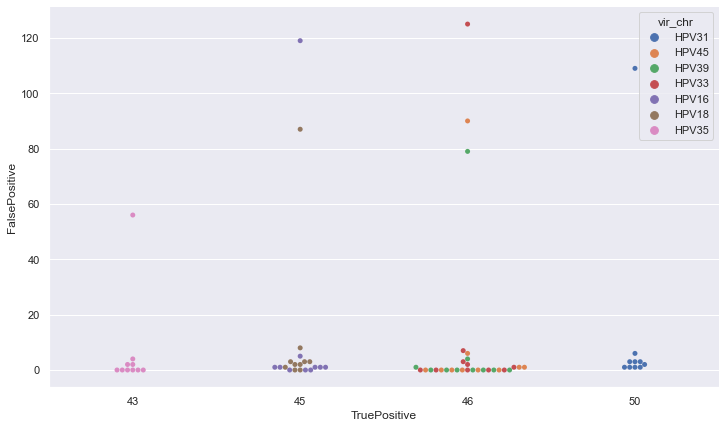

In [17]:
#TRUE
file_in = "methods/BatVI/benchmarking/benchmarking_out/Benchmarking_Output.txt.TP_called_per_virus"
df = pd.read_csv(file_in, sep = "\t")
df_true = df
df_true = df_true.rename({"sum_found":"TruePositive"},axis = 1)
#FALSE
file_in = "methods/BatVI/benchmarking/benchmarking_out/Benchmarking_Output.txt.FP_per_virus"
df = pd.read_csv(file_in, sep = "\t")
df = formatFPs(df, hpvs)
df_false = df
df_false = df_false.rename({"n":"FalsePositive"},axis = 1)
# MERGE
df = df_true.merge(df_false, on = ["min_reads","vir_chr"])

fig = px.strip(df, 
               x = "TruePositive", y = "FalsePositive", 
               color="vir_chr").update_traces(jitter = 1)
fig.update_traces(marker_size=10)
fig.show(renderer="colab")





import seaborn as sns
sns.set(rc={'figure.figsize':(12,7)})
sns.set(style='ticks', context='talk')
sns.set_theme(style="darkgrid")
sns.swarmplot(data=df, x='TruePositive', y='FalsePositive', hue="vir_chr")
sns.despine()

# <font color='LightGreen'>Plotting VIRUSBreakend</font>

## True Positives 

In [42]:


hpvs = ["HPV16","HPV18","HPV45","HPV35","HPV31","HPV33","HPV39"]
df = pd.DataFrame()
for i in hpvs:
    file_path = f"methods/VIRUSBreakend/benchmarking/benchmarking_out/{i}/Benchmarking_Output.txt.TP_called_per_virus"
    df_tmp = pd.read_csv(file_path, sep = "\t")
    df = pd.concat([df,df_tmp])
df


import plotly.express as px
fig = px.strip(df, x="vir_chr", y="sum_found", 
               color="min_reads")#.update_traces(jitter = 0)
fig.update_traces(marker_size=20)

fig.update_yaxes(
    range=(0, 20.5),
    constrain='domain'
)


fig.show(renderer="colab")

# <font color='LightGreen'>Plotting nf-VIF</font>

## True Positives

In [18]:

file_in = "methods/NF_VIF/benchmarking/benchmarking_out/Benchmarking_Output.txt.TP_called_per_virus"

df = pd.read_csv(file_in, sep = "\t")
df


import plotly.express as px
fig = px.strip(df, x="vir_chr", y="sum_found", 
               color="min_reads",
            #    stripmode="overlay"
               ).update_traces(jitter = 1)

fig.update_yaxes(
    range=(0, 50),
    constrain='domain'
)
fig.show(renderer="colab")

# <font color='LightGreen'>Plotting VIF</font>

## True Positives

In [22]:

file_in = "methods/ctat_VIF/benchmarking/benchmarking_out/refined_insertion_mappings.tsv.TP_called_per_virus"
df = pd.read_csv(file_in, sep = "\t")
df


import plotly.express as px
fig = px.strip(df, x="vir_chr", y="sum_found", 
               color="min_reads",
            #    stripmode="overlay"
               ).update_traces(jitter = 1)

fig.update_yaxes(
    range=(0, 50.5),
    constrain='domain'
)
fig.show(renderer="colab")

## False Positives

In [23]:
import itertools
file_in = "methods/ctat_VIF/benchmarking/benchmarking_out/refined_insertion_mappings.tsv.FP_per_virus"
df = pd.read_csv(file_in, sep = "\t")
df

df = formatFPs(df,hpvs)

fig = px.strip(df, x="vir_chr", y="n", 
               color="min_reads",
            #    stripmode="overlay"
               ).update_traces(jitter = 1)
fig.show(renderer="colab")



# <font color='LightGreen'>Compare all methods</font>

## TruePositives

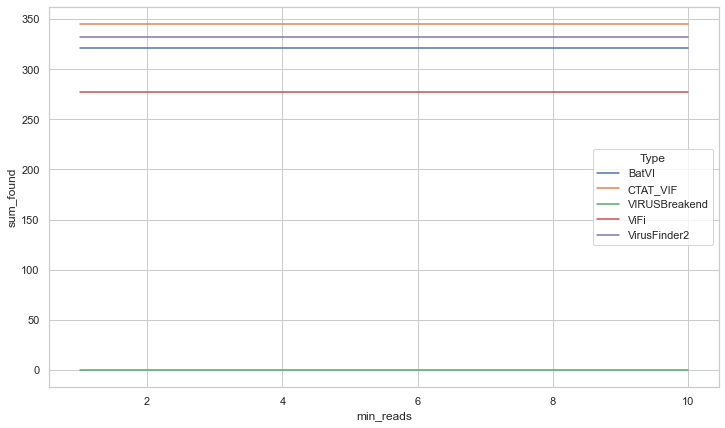

In [45]:

hpvs = ["HPV16","HPV18","HPV45","HPV35","HPV31","HPV33","HPV39"]

##########################
# ViFi
##########################
file_in = "methods/ViFi/benchmarking/benchmarking_out/Benchmarking_Output.txt.TP_called_per_virus"
ViFi_df = pd.read_csv(file_in, sep = "\t")
ViFi_df["Type"] = "ViFi"

ViFi_df = ViFi_df[ViFi_df["vir_chr"].isin(hpvs)]
ViFi_df


##########################
# VirusFinder2
##########################
VF2_df = pd.DataFrame()
for i in hpvs:
    file_path = f"methods/VirusFinder2/benchmarking/data/{i}/Benchmarking_Output.txt.TP_called_per_virus"
    df_tmp = pd.read_csv(file_path, sep = "\t")
    VF2_df = pd.concat([VF2_df, df_tmp])
VF2_df["Type"] = "VirusFinder2"


##########################
# BatVI
##########################
file_in = "methods/BatVI/benchmarking/benchmarking_out/Benchmarking_Output.txt.TP_called_per_virus"
BatVI_df = pd.read_csv(file_in, sep = "\t")
BatVI_df["Type"] = "BatVI"


##########################
# VIRUSBreakend
##########################
hpvs = ["HPV16","HPV18","HPV45","HPV35","HPV31","HPV33","HPV39"]
VB_df = pd.DataFrame()
for i in hpvs:
    file_path = f"methods/VIRUSBreakend/benchmarking/benchmarking_out/{i}/Benchmarking_Output.txt.TP_called_per_virus"
    df_tmp = pd.read_csv(file_path, sep = "\t")
    VB_df = pd.concat([VB_df,df_tmp])
VB_df["Type"] = "VIRUSBreakend"


##########################
# VIF
##########################
file_in = "methods/ctat_VIF/benchmarking/benchmarking_out/refined_insertion_mappings.tsv.TP_called_per_virus"
VIF_df = pd.read_csv(file_in, sep = "\t")
VIF_df["Type"] = "CTAT_VIF"

#~~~~~~~~~~~~~~~~
# combine
#~~~~~~~~~~~~~~~~
df = pd.concat([ViFi_df,VF2_df,BatVI_df, VIF_df, VB_df])

TP_df = df




import plotly.express as px

fig = px.strip(df, 
               x = "vir_chr",
               y = "sum_found", 
               color="Type"
               )
fig.update_traces(marker_size=10)

fig.update_yaxes(
    range=(0, 50),
    constrain='domain'
)

fig.show(renderer="colab")




##################
# One plot 
##################

df = df.groupby(["Type","min_reads"]).sum("sum_found")

sns.lineplot(
    data=df, x="min_reads", y="sum_found",
    hue="Type"
    )
TP_df_sum = df 

## False Positvees 

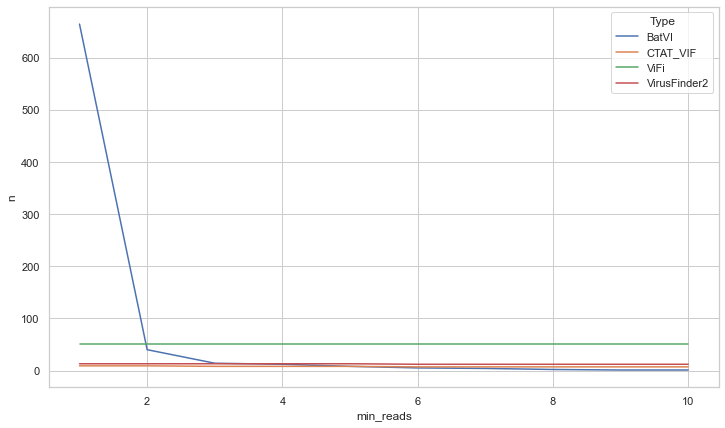

In [46]:

hpvs = ["HPV16","HPV18","HPV45","HPV35","HPV31","HPV33","HPV39"]

##########################
# ViFi
##########################
file_in = "methods/ViFi/benchmarking/benchmarking_out/Benchmarking_Output.txt.FP_per_virus"
ViFi_df = pd.read_csv(file_in, sep = "\t")

# ViFi_df = ViFi_df[ViFi_df["vir_chr"].isin(hpvs)]
ViFi_df = formatFPs(ViFi_df, hpvs=hpvs)
ViFi_df["Type"] = "ViFi"


##########################
# VirusFinder2
##########################
VF2_df = pd.DataFrame()
for i in hpvs:
    try:
        file_path = f"methods/VirusFinder2/benchmarking/data/{i}/Benchmarking_Output.txt.FP_per_virus"
        df_tmp = pd.read_csv(file_path, sep = "\t")
        VF2_df = pd.concat([VF2_df, df_tmp])
    except:
        1+1
VF2_df = formatFPs(VF2_df, hpvs=hpvs)
VF2_df["Type"] = "VirusFinder2"


##########################
# BatVI
##########################
file_in = "methods/BatVI/benchmarking/benchmarking_out/Benchmarking_Output.txt.FP_per_virus"
BatVI_df = pd.read_csv(file_in, sep = "\t")
BatVI_df = formatFPs(BatVI_df, hpvs=hpvs)
BatVI_df["Type"] = "BatVI"



##########################
# VIRUSBreakend
##########################
hpvs = ["HPV16","HPV18","HPV45","HPV35","HPV31","HPV33","HPV39"]
VB_df = pd.DataFrame()
for i in hpvs:
    try:
        file_path = f"methods/VIRUSBreakend/benchmarking/benchmarking_out/{i}/Benchmarking_Output.txt.FP_per_virus"
        df_tmp = pd.read_csv(file_path, sep = "\t")
        VB_df = pd.concat([VB_df,df_tmp])
    except:
        1+1
VB_df = formatFPs(VB_df, hpvs=hpvs)
VB_df["Type"] = "VIRUSBreakend"



##########################
# VIF
##########################
file_in = "methods/ctat_VIF/benchmarking/benchmarking_out/refined_insertion_mappings.tsv.FP_per_virus"
VIF_df = pd.read_csv(file_in, sep = "\t")
VIF_df = formatFPs(VIF_df, hpvs=hpvs)
VIF_df["Type"] = "CTAT_VIF"

#~~~~~~~~~~~~~~~~
# combine
#~~~~~~~~~~~~~~~~
df = pd.concat([ViFi_df,VF2_df,BatVI_df, VIF_df]) #, VB_df])

fp_df = df

import plotly.express as px

# fig = px.strip(df, 
#                x = "vir_chr", y = "n", 
#                color="Type"
#                )

fig = px.line(df, 
               x = "min_reads", y = "n", 
               color="Type",
               facet_col = "vir_chr",
               markers=True)
               
fig.update_traces(marker_size=5)
fig.update_yaxes(constrain='domain')
fig.show(renderer="colab")




# sns.set(style='ticks', context='talk')
# sns.set_theme(style="whitegrid")
# sns.lineplot( data=df, x='min_reads', y='n', hue="Type", col="vir_chr")
# sns.despine()



# sns.relplot(
#     data=df, x="min_reads", y="n",
#     col="vir_chr", hue="Type"#,kind="line"
# )


##################
# One plot 
##################

df = df.groupby(["Type","min_reads"]).sum("n")
sns.lineplot(
    data=df, x="min_reads", y="n",
    hue="Type"
    )
FP_df_sum = df 

## TP vs FP

In [48]:
# Adjust names 
TP_df = TP_df.rename({"sum_found":"TruePositive"}, axis = 1)
FP_df = fp_df.rename({"n":"FalsePositive"},axis = 1)

df = TP_df.merge(FP_df, on = ["min_reads","vir_chr","Type"])
df



,min_reads,vir_chr,TruePositive,Type,FalsePositive
0,1,HPV31,46,ViFi,4.0
1,1,HPV45,43,ViFi,5.0
2,1,HPV33,41,ViFi,6.0
3,1,HPV39,39,ViFi,10.0
4,1,HPV18,36,ViFi,8.0
...,...,...,...,...,...
275,10,HPV39,50,CTAT_VIF,0.0
276,10,HPV45,50,CTAT_VIF,0.0
277,10,HPV18,49,CTAT_VIF,0.0
278,10,HPV16,48,CTAT_VIF,2.0


/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



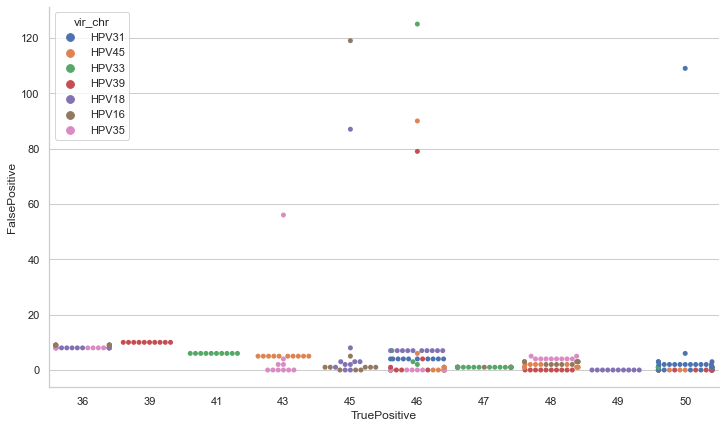

In [49]:

import seaborn as sns

sns.set(style='ticks', context='talk')
sns.set_theme(style="whitegrid")
sns.swarmplot(data=df, x='TruePositive', y='FalsePositive', hue="vir_chr")
sns.despine()



fig = px.strip(df, 
               x = "TruePositive", y = "FalsePositive", 
               color="vir_chr", 
               facet_col = "Type")
fig.update_traces(marker_size=5)
fig.show(renderer="colab")

fig = px.line(df, 
               x = "TruePositive", y = "FalsePositive", 
               color="vir_chr", 
               facet_col = "Type", markers=True)
# fig.update_traces(marker_size=5)
fig.show(renderer="colab")




# Adjust names 
TP_df_sum = TP_df_sum.rename({"sum_found":"TruePositive"}, axis = 1)
FP_df_sum = FP_df_sum.rename({"n":"FalsePositive"}, axis = 1)

df = TP_df_sum.merge(FP_df_sum, on = ["min_reads","Type"],)
df.reset_index(inplace=True)


fig = px.line(df, 
               x = "TruePositive", y = "FalsePositive", 
               color="Type",markers=True)
               
fig.update_traces(marker_size=5)
fig.update_yaxes(constrain='domain')
fig.show(renderer="colab")



# <font color='LightGreen'>Combined 50 insertions </font>

## TP

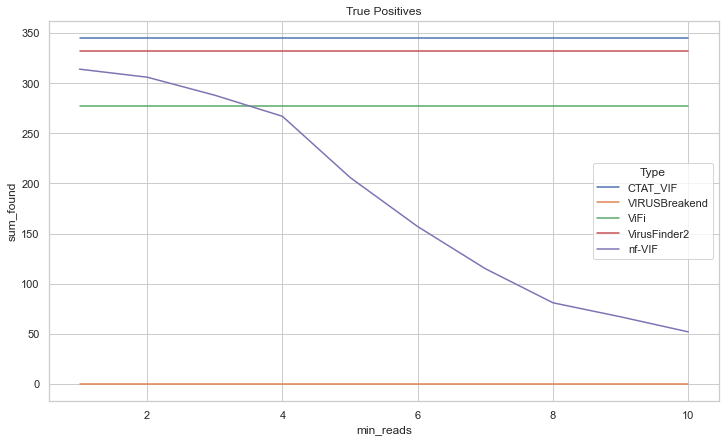

In [50]:

hpvs = ["HPV16","HPV18","HPV45","HPV35","HPV31","HPV33","HPV39"]

##########################
# ViFi
##########################
file_in = "methods/ViFi/benchmarking/benchmarking_out/Benchmarking_Output.txt.TP_called_per_virus"
ViFi_df = pd.read_csv(file_in, sep = "\t")
ViFi_df["Type"] = "ViFi"

ViFi_df = ViFi_df[ViFi_df["vir_chr"].isin(hpvs)]
ViFi_df


# ##########################
# # VirusFinder2
# ##########################
VF2_df = pd.DataFrame()
for i in hpvs:
    file_path = f"methods/VirusFinder2/benchmarking/data/{i}/Benchmarking_Output.txt.TP_called_per_virus"
    df_tmp = pd.read_csv(file_path, sep = "\t")
    VF2_df = pd.concat([VF2_df, df_tmp])
VF2_df["Type"] = "VirusFinder2"


##########################
# BatVI
##########################
file_in = "methods/BatVI/benchmarking/benchmarking_out/Benchmarking_Output.txt.TP_called_per_virus"
BatVI_df = pd.read_csv(file_in, sep = "\t")
BatVI_df["Type"] = "BatVI"


##########################
# VIRUSBreakend
##########################
hpvs = ["HPV16","HPV18","HPV45","HPV35","HPV31","HPV33","HPV39"]
VB_df = pd.DataFrame()
for i in hpvs:
    file_path = f"methods/VIRUSBreakend/benchmarking/benchmarking_out/{i}/Benchmarking_Output.txt.TP_called_per_virus"
    df_tmp = pd.read_csv(file_path, sep = "\t")
    VB_df = pd.concat([VB_df,df_tmp])
VB_df["Type"] = "VIRUSBreakend"


##########################
# nf-VIF
##########################
file_in = "methods/NF_VIF/benchmarking/benchmarking_out/Benchmarking_Output.txt.TP_called_per_virus"
BatVI_df = pd.read_csv(file_in, sep = "\t")
BatVI_df["Type"] = "nf-VIF"


##########################
# ctat-VIF
##########################
file_in = "methods/ctat_VIF/benchmarking/benchmarking_out/refined_insertion_mappings.tsv.TP_called_per_virus"
VIF_df = pd.read_csv(file_in, sep = "\t")
VIF_df["Type"] = "CTAT_VIF"

#~~~~~~~~~~~~~~~~
# combine
#~~~~~~~~~~~~~~~~
df = pd.concat([ViFi_df,VF2_df,BatVI_df, VIF_df, VB_df])
TP_df = df



# fig = px.strip(df, 
#                x = "vir_chr",
#                y = "sum_found", 
#                color="Type"
#                )
# fig.update_traces(marker_size=10)
# fig.update_yaxes(range=(0, 51),constrain='domain')
# fig.show(renderer="colab")

#~~~~~~~~~~~~~~~~
# Plot
#~~~~~~~~~~~~~~~~
fig = px.line(df, 
               x = "min_reads", y = "sum_found", 
               color="Type",
               facet_col = "vir_chr",
              labels=dict(n="True Positives", min_reads = "Minimum Reads"),
               markers=True)
               
fig.update_traces(marker_size=5)
fig.update_yaxes(constrain='domain')
fig.update_layout(title_text = "True Positives",title_x=0.5)
fig.show(renderer="colab")

# # Seaborn Version
# df = df.reset_index()
# rel_plot = sns.relplot(data=df, 
#                        x="min_reads", y="sum_found",
#                        col="vir_chr", hue="Type",
#                        kind="line"
#                        )
# rel_plot.fig.subplots_adjust(top=.8)
# rel_plot.fig.suptitle('True Positives')


##################
# One plot 
##################

df = df.groupby(["Type","min_reads"]).sum("sum_found")
plt_line = sns.lineplot(
    data=df, 
    x="min_reads", y="sum_found",
    hue="Type"
    ).set(title='True Positives')
TP_df_sum = df 

## FP

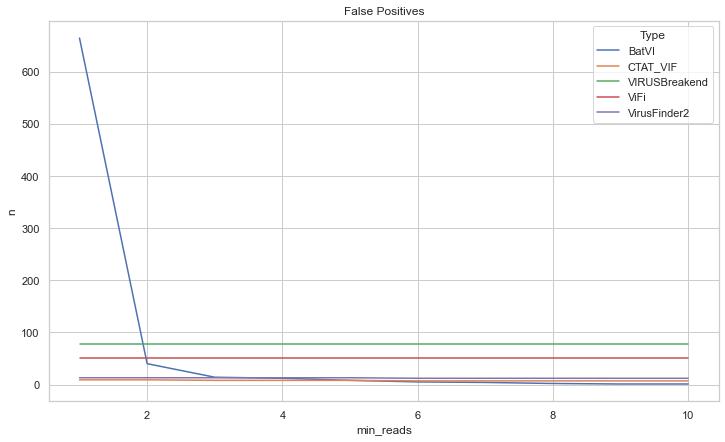

In [51]:

hpvs = ["HPV16","HPV18","HPV45","HPV35","HPV31","HPV33","HPV39"]

##########################
# ViFi
##########################
file_in = "methods/ViFi/benchmarking/benchmarking_out/Benchmarking_Output.txt.FP_per_virus"
ViFi_df = pd.read_csv(file_in, sep = "\t")

# ViFi_df = ViFi_df[ViFi_df["vir_chr"].isin(hpvs)]
ViFi_df = formatFPs(ViFi_df, hpvs=hpvs)
ViFi_df["Type"] = "ViFi"


##########################
# VirusFinder2
##########################
VF2_df = pd.DataFrame()
for i in hpvs:
    try:
        file_path = f"methods/VirusFinder2/benchmarking/data/{i}/Benchmarking_Output.txt.FP_per_virus"
        df_tmp = pd.read_csv(file_path, sep = "\t")
        VF2_df = pd.concat([VF2_df, df_tmp])
    except:
        1+1
VF2_df = formatFPs(VF2_df, hpvs=hpvs)
VF2_df["Type"] = "VirusFinder2"


##########################
# BatVI
##########################
file_in = "methods/BatVI/benchmarking/benchmarking_out/Benchmarking_Output.txt.FP_per_virus"
BatVI_df = pd.read_csv(file_in, sep = "\t")
BatVI_df = formatFPs(BatVI_df, hpvs=hpvs)
BatVI_df["Type"] = "BatVI"


##########################
# VIRUSBreakend
##########################
hpvs = ["HPV16","HPV18","HPV45","HPV35","HPV31","HPV33","HPV39"]
VB_df = pd.DataFrame()
for i in hpvs:
    try:
        file_path = f"methods/VIRUSBreakend/benchmarking/benchmarking_out/{i}/Benchmarking_Output.txt.FP_per_virus"
        df_tmp = pd.read_csv(file_path, sep = "\t")
        VB_df = pd.concat([VB_df,df_tmp])
    except:
        1+1
VB_df = formatFPs(VB_df, hpvs=hpvs)
VB_df["Type"] = "VIRUSBreakend"


##########################
# ctat-VIF
##########################
file_in = "methods/ctat_VIF/benchmarking/benchmarking_out/refined_insertion_mappings.tsv.FP_per_virus"
VIF_df = pd.read_csv(file_in, sep = "\t")
VIF_df = VIF_df[VIF_df["vir_chr"].isin(hpvs)]
VIF_df = formatFPs(VIF_df, hpvs=hpvs)
VIF_df["Type"] = "CTAT_VIF"

#~~~~~~~~~~~~~~~~
# combine
#~~~~~~~~~~~~~~~~
df = pd.concat([ViFi_df,VF2_df,BatVI_df, VIF_df, VB_df])
FP_df = df

#~~~~~~~~~~~~~~~~
# Plot
#~~~~~~~~~~~~~~~~
fig = px.line(df, 
               x = "min_reads", y = "n", 
               color="Type",
               facet_col = "vir_chr",
              labels=dict(n="False Positives", min_reads = "Minimum Reads"),
               markers=True)
               
fig.update_traces(marker_size=5)
fig.update_yaxes(constrain='domain')
fig.update_layout(title_text = "False Positives",title_x=0.5)
fig.show(renderer="colab")


# df = df.reset_index()
# rel_plot = sns.relplot(data=df, 
#                        x="min_reads", y="n",
#                        col="vir_chr", hue="Type",
#                        kind="line"
#                        )
# rel_plot.fig.subplots_adjust(top=.8)
# rel_plot.fig.suptitle('False Positives')


##################
# One plot 
##################

df = df.groupby(["Type","min_reads"]).sum("n")
plt_line = sns.lineplot(
    data=df, 
    x="min_reads", y="n",
    hue="Type"
    ).set(title = 'False Positives')
FP_df_sum = df 

## TP vs FP

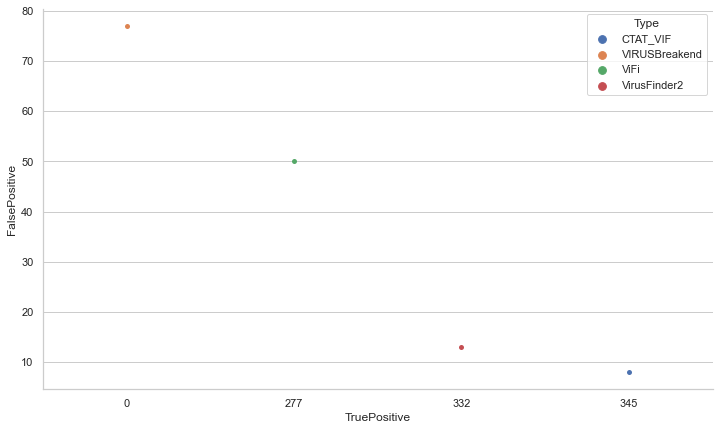

In [52]:
# Adjust names 
TP_df = TP_df.rename({"sum_found":"TruePositive"}, axis = 1)
FP_df = FP_df.rename({"n":"FalsePositive"},axis = 1)

df = TP_df.merge(FP_df, on = ["min_reads","vir_chr","Type"])
df
df = df[df["min_reads"] == 5]

#############################
#           Plot            #
#############################
# sns.set(style='ticks', context='talk')
# sns.set_theme(style="whitegrid")
# sns.swarmplot(data=df, x='TruePositive', y='FalsePositive', hue="vir_chr")
# sns.despine()


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~`
# Facet Algorithm 
fig = px.line(df, 
               x = "TruePositive", y = "FalsePositive", 
               color="vir_chr", 
               facet_col = "Type", markers=True)
# fig.update_traces(marker_size=5)
fig.show(renderer="colab")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~`
# Facet virus type 
fig = px.line(df, 
               x = "TruePositive", y = "FalsePositive", 
               color="Type", 
               facet_col = "vir_chr", markers=True)
# fig.update_traces(marker_size=5)
fig.show(renderer="colab")


####################################
#           Single Plot            #
####################################

# Adjust names 
TP_df_sum = TP_df_sum.rename({"sum_found":"TruePositive"}, axis = 1)
FP_df_sum = FP_df_sum.rename({"n":"FalsePositive"}, axis = 1)
df = TP_df_sum.merge(FP_df_sum, on = ["min_reads","Type"],)
df.reset_index(inplace=True)
df = df[df["min_reads"] == 5]
df

fig = px.line(df, 
               x = "TruePositive", y = "FalsePositive", 
               color="Type",markers=True)
               
fig.update_traces(marker_size=5)
fig.update_yaxes(constrain='domain')
fig.show(renderer="colab")



sns.set(style='ticks', context='talk')
sns.set_theme(style="whitegrid")
sns.swarmplot(data=df, x='TruePositive', y='FalsePositive', hue="Type")
sns.despine()

In [53]:
# Adjust names 
TP_df = TP_df.rename({"sum_found":"TruePositive"}, axis = 1)
FP_df = FP_df.rename({"n":"FalsePositive"},axis = 1)

df = TP_df.merge(FP_df, on = ["min_reads","vir_chr","Type"])
df
df = df[df["min_reads"] == 5]
# Drop min reads column
df = df.drop("min_reads", axis=1)

df = pd.melt(df, id_vars=['Type','vir_chr'], value_vars=['TruePositive','FalsePositive'])

# fig = px.bar(df, x="vir_chr", y="value", color="variable", title="PLOT!",
#                 #barmode='group'
#                 )
# fig.show()



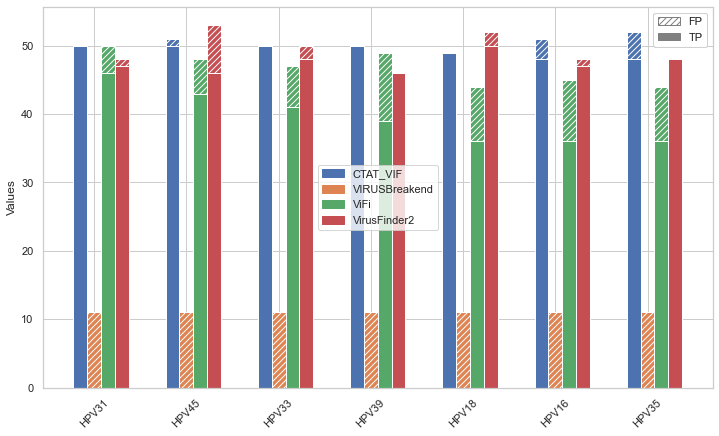

In [54]:
###########
# Virus at X axis 
fig, ax = plt.subplots()
# figure(figsize=(1,1))
# fig.set_dpi(100)
plt.rcParams["figure.figsize"] = (17,6)

bar_width = 0.15
epsilon = .015
bar_positions = np.arange(len(df.vir_chr.unique()))
bar_positions = bar_positions - .15
colors = [mcolors.TABLEAU_COLORS[i] for i in mcolors.TABLEAU_COLORS]
colors = sns.color_palette(  )
label=[]
for i, g in enumerate(df.groupby("Type")):
    df_sub = g[1]
    color_choice = colors[i]
    tmp1 = df_sub[df_sub["variable"] == "TruePositive"]
    axe = ax.bar(x      = bar_positions, #df_sub["vir_chr"],
                 height = tmp1["value"],
                 width  = bar_width,
                 label  = tmp1["variable"],
                 color = color_choice,
                    # grid=False,
                    )  # make bar plots

    tmp2 = df_sub[df_sub["variable"] == "FalsePositive"]
    axe = ax.bar(x      = bar_positions, #df_sub["vir_chr"],
                 height = tmp2["value"],
                 width = bar_width,
                 label = None,#tmp2["variable"],
                 bottom = tmp1["value"],
                 hatch='////',
                 color = color_choice,
                    )  # make bar plots

    TYPE = df_sub.Type.unique()[0]
    # label.append([TYPE,"TruePositive"])
    # label.append([TYPE,"FalsePositive"])
    label.append(TYPE)
    bar_positions = bar_positions + bar_width


plt.xticks(np.arange(len(df.vir_chr.unique())), df.vir_chr.unique(), rotation=45)
plt.ylabel('Values')

L=plt.legend()
# for i,g in enumerate(L.get_texts()):
#     L.get_texts()[i].set_text(" ".join(label[i]))



for i in range(len(df.Type.unique())):
    L.get_texts()[i].set_text(label[i])
    L.legendHandles[i].set_color(colors[i])

lables = [label[i] for i in range(len(df.Type.unique()))]
coloring = [colors[i] for i in range(len(df.Type.unique()))]


ax.add_artist(L)

import matplotlib.patches as mpatches
PF_patch = mpatches.Patch(edgecolor="grey", facecolor="white",hatch = "////", label='FP')
TP_patch = mpatches.Patch(edgecolor="grey", facecolor="grey",hatch = "//", label='TP')
L2 = ax.legend(handles=[PF_patch,TP_patch])
ax.add_artist(L2)

plt.show()

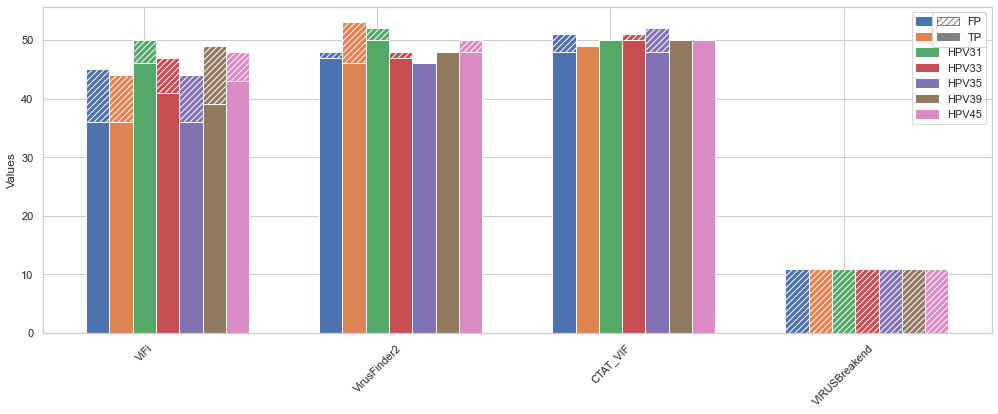

In [55]:
###########
# Type at X axis 


fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (17,6)

bar_width = 0.2
epsilon = .02
bar_positions = np.arange(len(df.Type.unique()))*2
bar_positions = bar_positions - 0.4
colors = [mcolors.TABLEAU_COLORS[i] for i in mcolors.TABLEAU_COLORS]
colors = sns.color_palette(  )
label=[]
for i, g in enumerate(df.groupby("vir_chr")):
    df_sub = g[1]
    color_choice = colors[i]

    tmp1 = df_sub[df_sub["variable"] == "TruePositive"]
    axe = ax.bar(x      = bar_positions, #df_sub["vir_chr"],
                 height = tmp1["value"],
                 width  = bar_width,
                 label  = tmp1["variable"],
                 color = color_choice
                #  color = "blue"
                    # grid=False,
                    )  # make bar plots

    tmp2 = df_sub[df_sub["variable"] == "FalsePositive"]
    axe = ax.bar(x      = bar_positions, #df_sub["vir_chr"],
                 height = tmp2["value"],
                 width = bar_width,
                 label = None,#tmp2["variable"],
                 bottom = tmp1["value"],
                 hatch='////',
                 color = color_choice
                #  color = "red"
                    )  # make bar plots
    # get info for legend
    TYPE = df_sub.vir_chr.unique()[0]
    label.append(TYPE)
    # move bars
    bar_positions = bar_positions + bar_width


plt.xticks(bar_positions-1, df.Type.unique(), rotation=45)
plt.ylabel('Values')
L=plt.legend()

for i in range(len(df.vir_chr.unique())):
    L.get_texts()[i].set_text(label[i])
    L.legendHandles[i].set_color(colors[i])

lables = [label[i] for i in range(len(df.vir_chr.unique()))]
coloring = [colors[i] for i in range(len(df.vir_chr.unique()))]


ax.add_artist(L)



import matplotlib.patches as mpatches
PF_patch = mpatches.Patch(edgecolor="grey", facecolor="white",hatch = "////", label='FP')
TP_patch = mpatches.Patch(edgecolor="grey", facecolor="grey",hatch = "//", label='TP')
L2 = ax.legend(handles=[PF_patch,TP_patch])
ax.add_artist(L2)

plt.show()


In [56]:
for i in sns.color_palette(  ):
    print(i)

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
(0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
(0.3333333333333333, 0.6588235294117647, 0.40784313725490196)
(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
(0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
(0.5764705882352941, 0.47058823529411764, 0.3764705882352941)
(0.8549019607843137, 0.5450980392156862, 0.7647058823529411)
(0.5490196078431373, 0.5490196078431373, 0.5490196078431373)
(0.8, 0.7254901960784313, 0.4549019607843137)
(0.39215686274509803, 0.7098039215686275, 0.803921568627451)


## Precision Recall

In [57]:
# Adjust names 
TP_df = TP_df.rename({"sum_found":"TruePositive"}, axis = 1)
FP_df = FP_df.rename({"n":"FalsePositive"},axis = 1)

df = TP_df.merge(FP_df, on = ["min_reads","vir_chr","Type"])
Precision = df["TruePositive"] / (df["TruePositive"] + df["FalsePositive"])
Precision

FalseNegatives = (50) - df["TruePositive"]
Recall = df["TruePositive"] / (df["TruePositive"] + FalseNegatives)

df["FalseNegatives"] = FalseNegatives
df["Precision"] = Precision
df["Recall"] = Recall

F1 = 2*(Precision * Recall) / (Precision + Recall)
df["F1"] = F1
df
df = df[df["min_reads"] == 5]


# fig = px.line(df,
#               x = "Recall", y = "Precision", 
#               color="Type", 
#               facet_col = "vir_chr", markers=True)
# fig.show(renderer="colab")


Text(0.5, 0.98, 'Pipeline Precision Recall Per Virus Type')

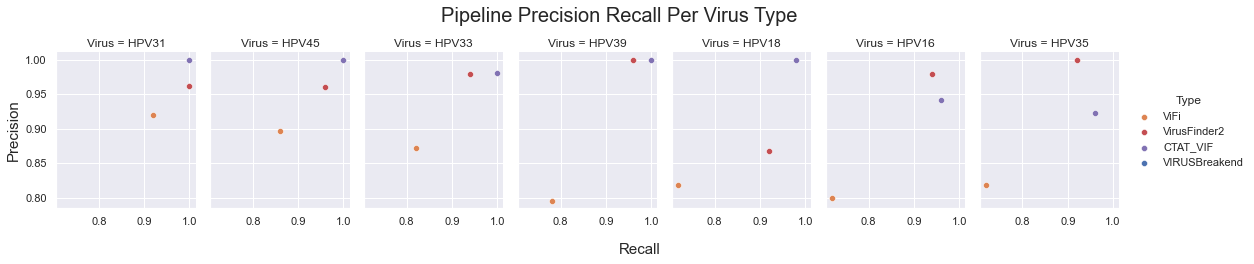

In [59]:
##################
# Set Pallet!
##################
palette ={"VIRUSBreakend": "C0", 
          "ViFi": "C1", 
          "BatVI": "C2", 
          "VirusFinder2": "C3",
          "CTAT_VIF": "C4"}

hpvs = ["HPV31","HPV45","HPV33","HPV39","HPV18","HPV16","HPV35"]

df["Virus"] = df["vir_chr"]
sns.set(style="darkgrid")
g = sns.FacetGrid(df, col="Virus", hue="Type", height=3.5, aspect=.65, row_order=hpvs,palette=palette)#, margine_titles = True)
g.map_dataframe(sns.scatterplot, x="Recall", y="Precision")
g.add_legend()


#~~~~~~
# X labeling
#~~~~~~
# fix X Axis labels 
for i in range(0,7):
    g.axes[0,i].set_xlabel("")#hpvs[i])
# Xlabel Shared 
g.fig.text(.5, .001, 'Recall', size = 15)

#~~~~~~~~~~~~~~~~
# Y label 
#~~~~~~~~~~~~~~~~
g.set_ylabels("Precision", size = 15)
# for i in range(0,7):
#     g.axes[0,i].set_ylabel(hpvs[i])
#~~~~~~
# Title
#~~~~~~

# Add Title 
g.fig.subplots_adjust(top=0.8) 
g.fig.suptitle('Pipeline Precision Recall Per Virus Type', size = 20)



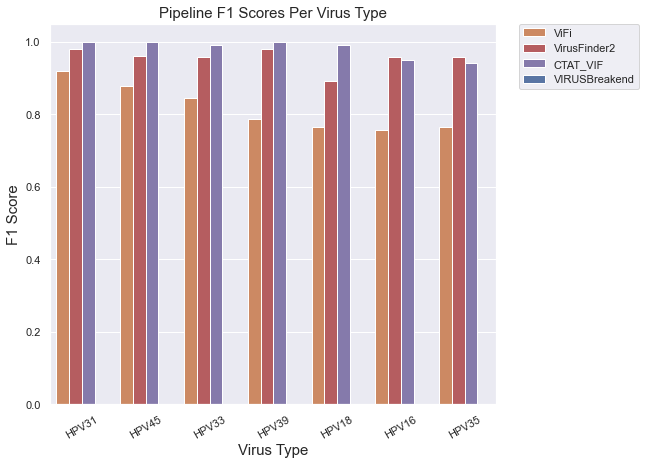

In [60]:


ordering = []
for i in df.vir_chr.unique():
    tmp = df[df["vir_chr"] == i]
    types = tmp.sort_values("F1").index
    ordering.append(types)
ordering = list(itertools.chain.from_iterable(ordering))
df = df.loc[ordering]
df = df.reset_index(drop=True)



sns.set(rc={'figure.figsize':(8,7)})

# sns.catplot(data= df, 
#                 x="vir_chr", y="F1",
#                 hue="Type",kind="bar")

ax = sns.barplot(data= df, 
                  x="vir_chr", y="F1", hue = "Type",
                 palette=palette)
ax.set_title('Pipeline F1 Scores Per Virus Type', fontsize = 15)
ax.set_ylabel("F1 Score", fontsize = 15)
ax.set_xlabel("Virus Type",fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# for bar in ax.patches:
#     print(bar)
#     print(bar.set_color("red"))
    # if bar.get_height() > 6:
    #     bar.set_color('red')    
    # else:
    #     bar.set_color('grey')

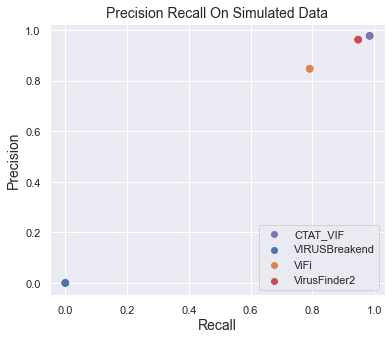

In [61]:
# Adjust names 
TP_df_sum = TP_df_sum.rename({"sum_found":"TruePositive"}, axis = 1)
FP_df_sum = FP_df_sum.rename({"n":"FalsePositive"}, axis = 1)
df = TP_df_sum.merge(FP_df_sum, on = ["min_reads","Type"],)
df.reset_index(inplace=True)
df

Precision = df["TruePositive"] / (df["TruePositive"] + df["FalsePositive"])
Precision

FalseNegatives = (50*7) - df["TruePositive"]
Recall = df["TruePositive"] / (df["TruePositive"] + FalseNegatives)

df["FalseNegatives"] = FalseNegatives
df["Precision"] = Precision
df["Recall"] = Recall

F1 = 2*(Precision * Recall) / (Precision + Recall)
df["F1"] = F1
df

df = df[df["min_reads"] == 5]
# fig = px.line(df,
#               x = "Recall", y = "Precision", 
#                color="Type", 
#               markers=True)
# fig.update_traces(marker_size=12)
# fig.update_layout(title_text = "False Positives",title_x=0.45)
# fig.write_html("test.html")
# fig.show(renderer="colab")


sns.set(rc={'figure.figsize':(6,5)})
p = sns.scatterplot(data=df,
                    x = "Recall", y = "Precision",
                    hue = "Type",
                    s = 80,
                    palette = palette)

p.set_title("Precision Recall On Simulated Data", size = 14)
p.set_xlabel("Recall", size = 14)
p.set_ylabel("Precision", size=14)
p.legend(loc='lower right')


[Text(0, 0, 'ViFi'),
 Text(1, 0, 'VirusFinder2'),
 Text(2, 0, 'CTAT_VIF'),
 Text(3, 0, 'VIRUSBreakend')]

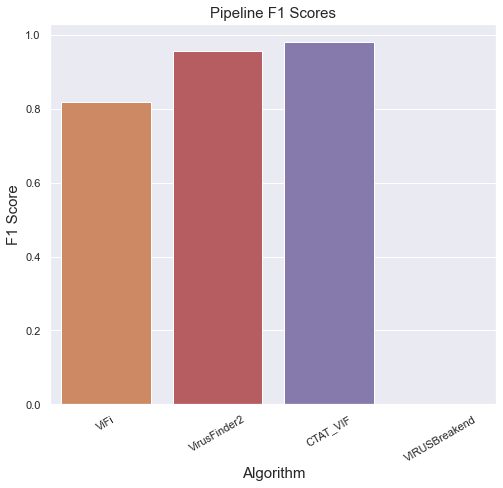

In [62]:
sns.set(rc={'figure.figsize':(8,7)})
# ax = sns.catplot(data= df, 
#                   x="Type", y="F1",
#                   kind="bar",
#                   order = df.sort_values('F1').Type, 
#                   height = 5, )
ax = sns.barplot(data= df, 
                  x="Type", y="F1",
                  order = df.sort_values('F1').Type,
                 palette=palette)
# ax.set(title = 'Pipeline F1 Scores', fontsize = 20)
ax.set_title('Pipeline F1 Scores', fontsize = 15)
ax.set_ylabel("F1 Score", fontsize = 15)
ax.set_xlabel("Algorithm",fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)

# <font color='Red'> CHeck missed integrations </font>

In [64]:

hpvs = ["HPV16","HPV18","HPV45","HPV35","HPV31","HPV33","HPV39"]

##########################
# ViFi
##########################
file_in = "methods/ViFi/benchmarking/benchmarking_out/Benchmarking_Output.txt.TP_called_per_virus"
ViFi_df = pd.read_csv(file_in, sep = "\t")
ViFi_df["Type"] = "ViFi"

ViFi_df = ViFi_df[ViFi_df["vir_chr"].isin(hpvs)]
ViFi_df


# ##########################
# # VirusFinder2
# ##########################
VF2_df = pd.DataFrame()
for i in hpvs:
    file_path = f"methods/VirusFinder2/benchmarking/data/{i}/Benchmarking_Output.txt.TP_called_per_virus"
    df_tmp = pd.read_csv(file_path, sep = "\t")
    VF2_df = pd.concat([VF2_df, df_tmp])
VF2_df["Type"] = "VirusFinder2"


##########################
# BatVI
##########################
file_in = "methods/BatVI/benchmarking/benchmarking_out/Benchmarking_Output.txt.TP_called_per_virus"
BatVI_df = pd.read_csv(file_in, sep = "\t")
BatVI_df["Type"] = "BatVI"


##########################
# VIRUSBreakend
##########################
hpvs = ["HPV16","HPV18","HPV45","HPV35","HPV31","HPV33","HPV39"]
VB_df = pd.DataFrame()
for i in hpvs:
    file_path = f"methods/VIRUSBreakend/benchmarking/benchmarking_out/{i}/Benchmarking_Output.txt.TP_called_per_virus"
    df_tmp = pd.read_csv(file_path, sep = "\t")
    VB_df = pd.concat([VB_df,df_tmp])
VB_df["Type"] = "VIRUSBreakend"


##########################
# ctat-VIF
##########################
file_in = "methods/ctat_VIF/benchmarking/benchmarking_out/refined_insertion_mappings.tsv.TP_called_per_virus"
VIF_df = pd.read_csv(file_in, sep = "\t")
VIF_df["Type"] = "CTAT_VIF"

#~~~~~~~~~~~~~~~~
# combine
#~~~~~~~~~~~~~~~~
df = pd.concat([ViFi_df,VF2_df,BatVI_df, VIF_df, VB_df])



df




,min_reads,vir_chr,sum_found,Type
0,1,HPV31,46,ViFi
1,1,HPV45,43,ViFi
2,1,HPV33,41,ViFi
3,1,HPV39,39,ViFi
4,1,HPV18,36,ViFi
...,...,...,...,...
5,6,HPV39,0,VIRUSBreakend
6,7,HPV39,0,VIRUSBreakend
7,8,HPV39,0,VIRUSBreakend
8,9,HPV39,0,VIRUSBreakend
